In [87]:
# This is a solution for problem set 4, Monetary Economics, University Of Minnesota 05/02/2023

In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# Parameters of the model:

β = 0.9
R = 1/β 
ϕ = 0.2
y = 1
π = 0.5
γ = 5
b_min = 0
b_max = 0.9
b_size = 4000
b_grid = np.linspace(b_min, b_max, b_size)


def u(c):                                               # Utiltiy function.
    return c**(1-γ)/(1-γ)

v_d = (1/(1-β)) * u(y-ϕ)                                # Value of default.
v_0 = (1/(1-β)) * u(y)                                  # Value of no debt. 

def v_rm(b):                                            # Value of repayment in the bad sp.
    return u(y - b) + β * v_0

b_m = np.argmax((v_rm(b_grid)- v_d)<=0)                 # b-, index value of default under bad sp. 

In [90]:
# Guess:

q = 1/R * np.ones(b_size)                               # Price function.
v_rp = (1/(1-β)) * u(y-b_grid)                          # Guess value of repayment in the good sp.

In [91]:
# Create update functions:

### Given v_rp_0 and q_0 find v_p_1:

def update_vrp(v_rp_0, q_0):
    v_rp1 = np.empty_like(v_rp_0)                       # Allocate memory.
    for b in range(b_size):
        v_rp1[b] = np.max(u(y-b_grid[b]+b_grid*q_0) + β * (π*v_rp_0+(1-π)*v_rm(b_grid)))
    # update b_+:
    for b in range(b_size):
        if v_rp1[b] - v_d <=0:
            b_p = b
            break
        else:
            b_p = b_size 
    return v_rp1, b_p

### Given v_p_1 find E[d_1] as a function of bond holding for next period:

def update_Ed(v_rp1, b_p):
    Ed = np.empty_like(b_grid)
    update = lambda b: 0 if b_m >= b else ((1-π) if b_p >= b > b_m else 1)
    for b in range(b_size):
        Ed[b] = update(b)
    return Ed 

### Given d_1 update q_1: 

def update_q(Ed):
    q_1 = 1/R * (1 - Ed)
    return q_1

In [92]:
# Iterate until convergence:
iter = 0 
error_1 = 10
error_2 = 10
α_q = 1
α_vrp = 1 

while error_1 > 10e-10 or error_2 > 10e-10:
    v_rp_1 = update_vrp(v_rp, q)[0]
    b_p = update_vrp(v_rp, q)[1]
    E_d = update_Ed(v_rp_1, b_p)
    q_1 = update_q(E_d)
    error_1 = np.max(np.abs(v_rp - v_rp_1))
    error_2 = np.max(np.abs(q_1 - q))
    # update:
    v_rp = α_vrp * v_rp_1.copy() + (1-α_vrp) * v_rp.copy()
    q = α_q *q_1.copy() + (1-α_q) * q.copy()
    print(iter, error_1, error_2)
    iter =+ 1
    if iter>3000:
        break

0 24984.062711372033 0.8999999999999999 10
1 8.192557900853153 0.44999999999999996 10
1 0.5540319746119167 0.44999999999999996 10
1 0.04803617929260007 0.44999999999999996 10
1 0.004765572861350265 0.44999999999999996 10
1 0.0006121355211252677 0.0 10
1 8.900979747927806e-05 0.0 10
1 1.3828530809334438e-05 0.0 10
1 2.232455214468132e-06 0.0 10
1 3.685330636216122e-07 0.0 10
1 6.155449661093826e-08 0.0 10
1 1.0485896595469058e-08 0.0 10
1 1.793649673231812e-09 0.0 10
1 2.9544544588588906e-10 0.0 10


<function matplotlib.pyplot.show(close=None, block=None)>

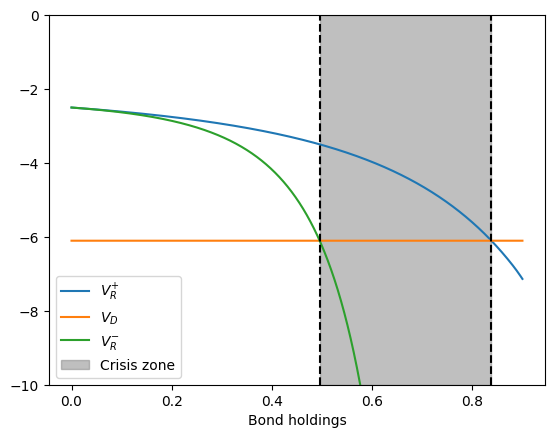

In [108]:
plt.plot(b_grid, v_rp, label = r"$V^{+}_R$")
plt.plot(b_grid, v_d * np.ones(b_size), label = r"$V_D$")
plt.plot(b_grid, v_rm(b_grid), label = r"$V^{-}_R$")
plt.axvline(x = b_grid[b_m], color = 'black', linestyle = 'dashed')
plt.axvline(x = b_grid[b_p], color = 'black', linestyle = 'dashed')
plt.axvspan(b_grid[b_m], b_grid[b_p], alpha=0.5, color='grey', label = r"Crisis zone")
plt.xlabel(r"Bond holdings")
plt.ylim([-10,0])
plt.legend()
plt.show
